In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv

In [2]:
dataset = 'IO_EU'
root = "/scratch/blaauw_root/blaauw1/gyichen"
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')

In [ ]:
# vv.preprocess(adata, n_gene=2000, min_shared_counts=20)
# adata.write_h5ad(f'data/{dataset}_pp.h5ad')

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = ['Lgr5', 'Apoa1', 'Dgat1', 'Gsta4']

# VeloVAE

In [4]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0')

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 200 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.48, 0.8095944335075349), (0.52, 0.30003896625133036)
(0.36, 0.35530083678956176), (0.64, 0.8420760207313772)
KS-test result: [0. 0. 1.]
Initial induction: 720, repression: 280/1000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 21, test iteration: 40
*********       Stage 1: Early Stop Triggered at epoch 343.       *********
*********                      Stage  2                       *********
*********

  0%|          | 0/3806 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.027
Average Set Size: 77
*********     Round 1: Early Stop Triggered at epoch 734.    *********
Change in noise variance: 0.3065
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 786.    *********
Change in noise variance: 0.0023
Change in x0: 0.2012
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 840.    *********
Change in noise variance: 0.0008
Change in x0: 0.0921
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 995.    *********
Change in noise variance: 0.0000
Change in x0: 0.0858
*********             Velocity Refinement Round 5             *********
Stage 2: Early Stop Triggered at round 4.
*********              Finished. Total Time =   0 h :  4 m : 42 s             *********
Final: Train ELBO = 2778.485,	Test ELBO = 2761.8

# Full VB

In [5]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 full_vb=True)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 200 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.48, 0.8095944335075349), (0.52, 0.30003896625133036)
(0.36, 0.35530083678956176), (0.64, 0.8420760207313772)
KS-test result: [0. 0. 1.]
Initial induction: 720, repression: 280/1000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 21, test iteration: 40
*********       Stage 1: Early Stop Triggered at epoch 538.       *********
*********                      Stage  2                       *********
*********

  0%|          | 0/3806 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.035
Average Set Size: 76
*********     Round 1: Early Stop Triggered at epoch 965.    *********
Change in noise variance: 0.3048
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 1004.    *********
Change in noise variance: 0.0065
Change in x0: 0.3558
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1024.    *********
Change in noise variance: 0.0003
Change in x0: 0.1422
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1089.    *********
Change in noise variance: 0.0000
Change in x0: 0.1072
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1103.    *********
Change in noise variance: 0.0000
Change in x0: 0.1064
*********             Velocity Refinement Round 6

# Plotting

In [2]:
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'IO_EU'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}_post.h5ad')

In [6]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


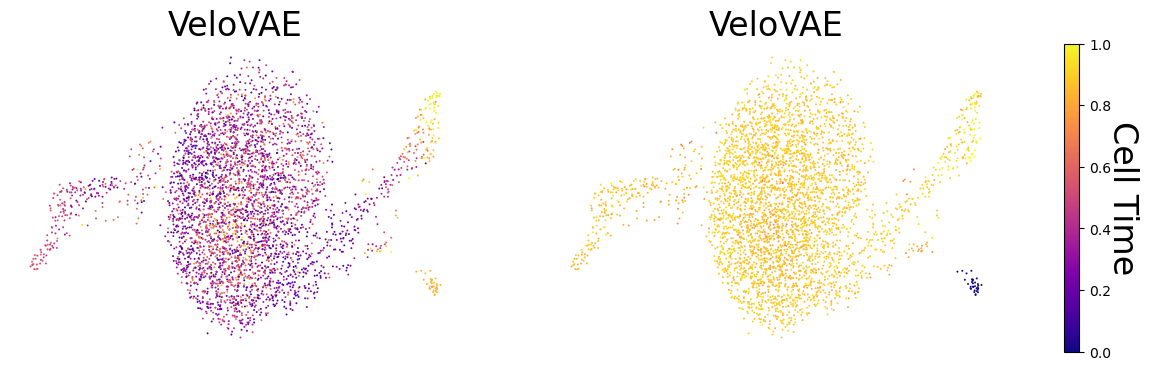

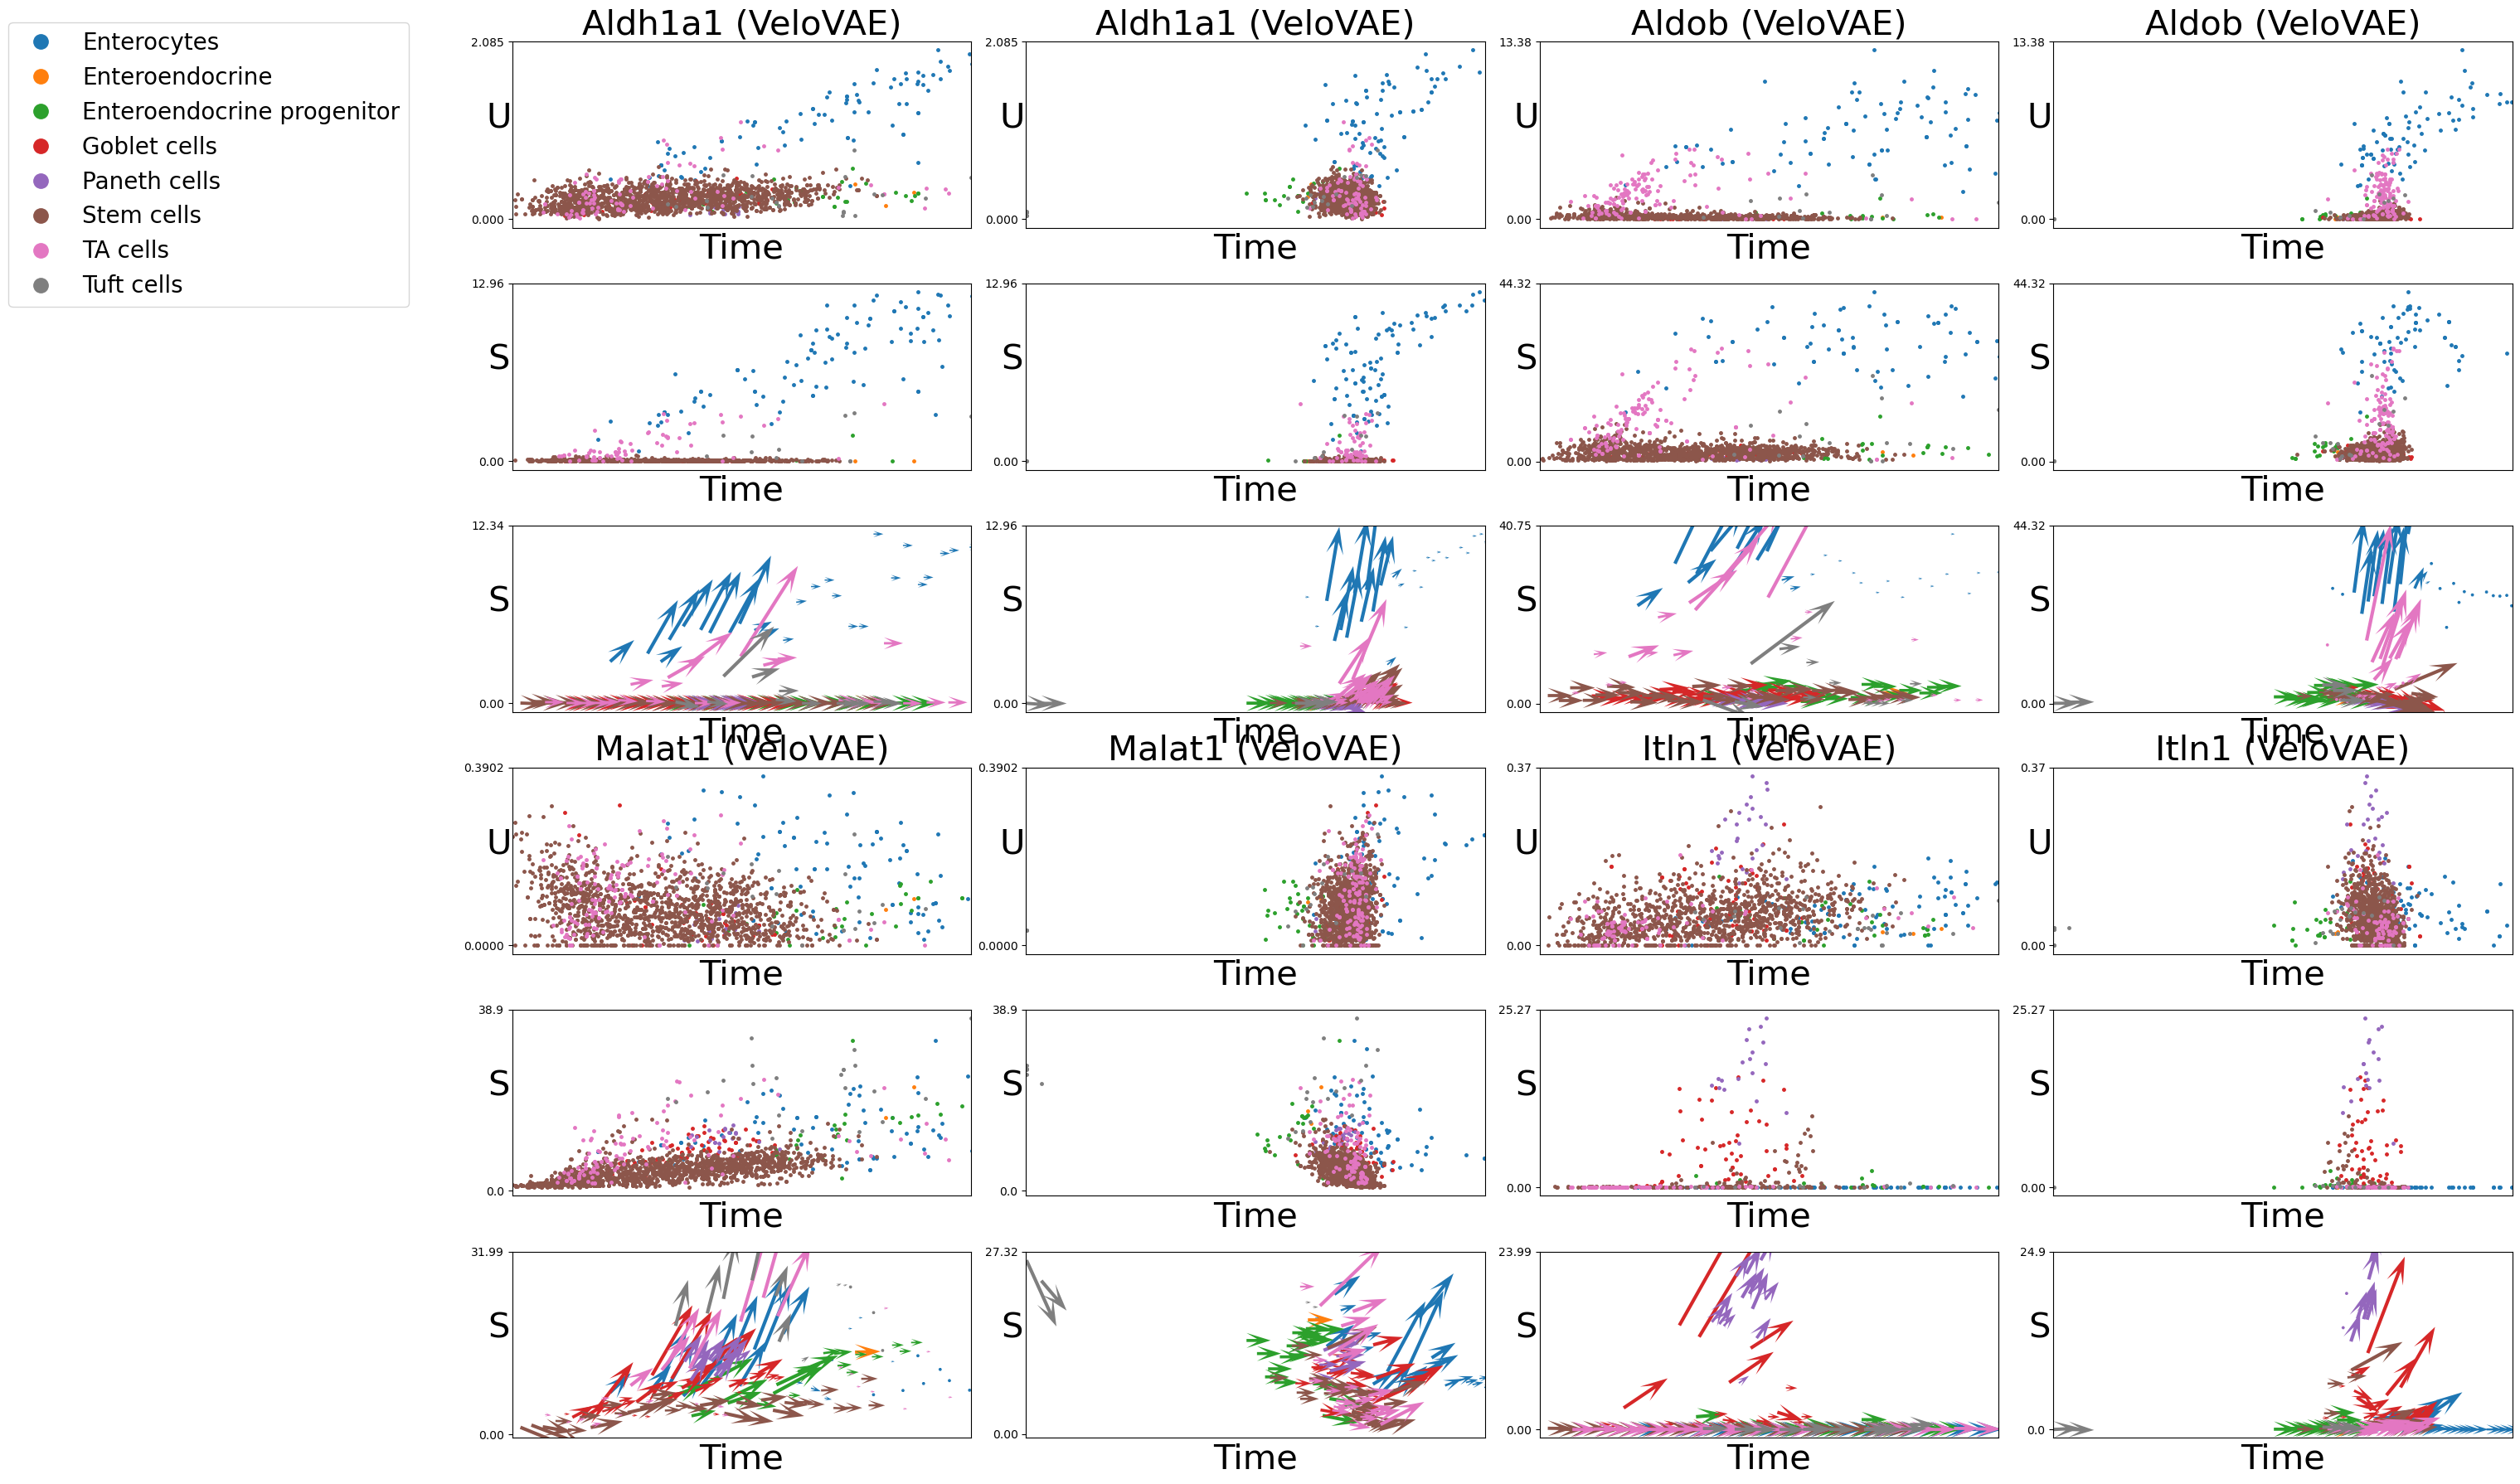

In [7]:
gidx = np.argsort(Ek)[-4:]
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2),
                                 figure_path=f'{root}/figures/{dataset}')

computing velocity graph (using 1/32 cores)


  0%|          | 0/3806 [00:00<?, ?cells/s]

    finished (0:00:13) --> added 
    'velovae_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velovae_velocity_umap', embedded velocity vectors (adata.obsm)


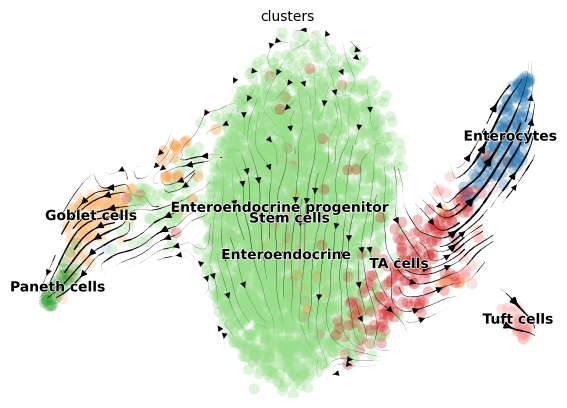

In [9]:
import scvelo as scv
scv.tl.velocity_graph(adata, vkey='velovae_velocity')
scv.pl.velocity_embedding_stream(adata, vkey='velovae_velocity')